#  Chapter 52: Nearest-Neighbor Rule

### This code generates figures 2 and 3 in Chapter 52: Nearest-Neighbor Rule (vol. III)
    

TEXT: A. H. Sayed, INFERENCE AND LEARNING FROM DATA, Cambridge University Press, 2022.

<div style="text-align: justify">
DISCLAIMER:  This computer code is  provided  "as is"   without  any  guarantees.
Practitioners  should  use it  at their own risk.  While  the  codes in  the text 
are useful for instructional purposes, they are not intended to serve as examples 
of full-blown or optimized designs.  The author has made no attempt at optimizing 
the codes, perfecting them, or even checking them for absolute accuracy. In order 
to keep the codes at a level  that is  easy to follow by students, the author has 
often chosen to  sacrifice  performance or even programming elegance in  lieu  of 
simplicity. Students can use the computer codes to run variations of the examples 
shown in the text. 
</div>

The Jupyter notebook and python codes are developed by Saba Nasiri. 

required libraries :

1. numpy
2. import matplotlib.pyplot
3. from scipy.spatial

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy.spatial import Voronoi, voronoi_plot_2d


## figure 52.2, 5-NN rule

Figure 52.2 illustrates the separating regions in the plane that would result for $k=5$ neighbors and $R=3$ classes. The training data is represented by the colored circles (green for  $r=1$, red for $r=2$, and yellow for $r=3$). The colored regions represent the class that would be assigned to any feature vector falling into the region. For example, if a location in the plane is colored in red, the color indicates that the majority of the five neighbors to this location will belong to class $r=2$. Therefore, any feature $h$  falling into the red region will be assigned to class $r=2$, and similarly for the two other colored regions. This figure was generated using a total of $N=150$ random training points within the region $[0,1]\times[0,1]$.


In [2]:
N = 150 # number of points
K = 5 # number of neighbors
x = np.random.rand(N)
y = np.random.rand(N)

gamma = []
xtg = np.zeros((N,))
ytg = np.zeros((N,))
xtr = np.zeros((N,))
ytr = np.zeros((N,))
xty = np.zeros((N,))
yty = np.zeros((N,))

for m in range(N): # assigning classes 1, 2 or 3 to these 100 points
    a = np.random.rand(1)[0]
    if a < 1/3:
        gamma.append(1)
        xtg[m] = x[m]
        ytg[m] = y[m]
    else:
        if a>=1/3 and a<2/3:
            gamma.append(2)
            xtr[m] = x[m]
            ytr[m] = y[m]
        else:
            if a>= 2/3:
                gamma.append(3)
                xty[m] = x[m]
                yty[m] = y[m]
    
ix = 0
iy = 0

d2 = np.zeros((N,))
classes = np.zeros((len(np.arange(0, 1.005, 0.005)), len(np.arange(0, 1.005, 0.005))))
xg = np.zeros((len(np.arange(0, 1.005, 0.005)), len(np.arange(0, 1.005, 0.005))))
xr = np.zeros((len(np.arange(0, 1.005, 0.005)), len(np.arange(0, 1.005, 0.005))))
xye = np.zeros((len(np.arange(0, 1.005, 0.005)), len(np.arange(0, 1.005, 0.005))))
yg = np.zeros((len(np.arange(0, 1.005, 0.005)), len(np.arange(0, 1.005, 0.005))))
yr = np.zeros((len(np.arange(0, 1.005, 0.005)), len(np.arange(0, 1.005, 0.005))))
yye = np.zeros((len(np.arange(0, 1.005, 0.005)), len(np.arange(0, 1.005, 0.005))))

for xx in np.arange(0, 1.005, 0.005): # comb the plane with a fine resolution
    for yy in np.arange(0, 1.005, 0.005):
        
        for m in range(N):
            d2[m] = (x[m]-xx)**2 + (y[m]-yy)**2 # squared distance
            
        idx = np.argsort(d2) # sort
        idx2 = idx[0:K] # index of K closest points
        GN = np.zeros((K,))
        XN = np.zeros((K,))
        YN = np.zeros((K,))
        for kk in range(K):
            XN = x[idx2] # x-coordinates of nearest K neighbors
            YN = y[idx2] # y-coordinates of nearest K neighbors
            GN = np.array(gamma)[idx2] # classes of nearest K-neighbors
            counter_1 = 0;
            counter_1 = 0
            counter_2 = 0
            counter_3 = 0
            
            for ss in range(K): # count how many of each class in the neighborhood
                if GN[ss] == 1:
                    counter_1 = counter_1 + 1
                    
                if GN[ss] == 2:
                    counter_2 = 2
                    
                if GN[ss] == 3:
                    counter_3 = counter_3 + 1
                        
            cc = []
            cc.append(counter_1)
            cc.append(counter_2)
            cc.append(counter_3)
        
            idc = cc.index(max(cc)) # idc is the index of the class with the most votes
            if idc == 0:
                classes[ix, iy] = 1 # majority is class 1
                xg[ix, iy] = xx # green point
                yg[ix, iy] = yy
        
            if idc == 1:
                classes[ix, iy] = 2 # majority is class 2
                xr[ix, iy] = xx # red point 
                yr[ix, iy] = yy
        
            if idc == 2:
                classes[ix, iy] = 3 # majority is class 3
                xye[ix, iy] = xx # yellow point 
                yye[ix, iy] = yy
              
        iy = iy + 1
        
    iy = 0
    ix = ix + 1
        

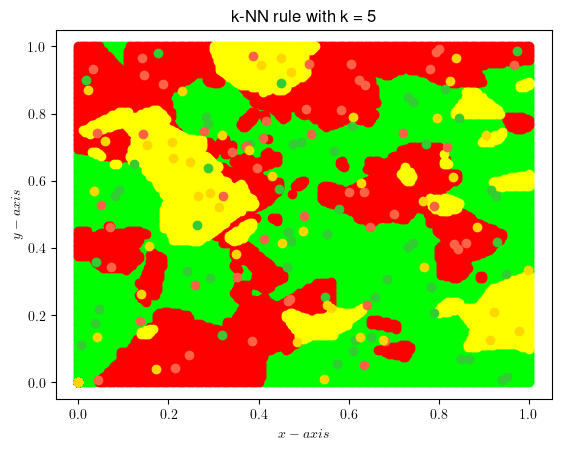

In [4]:
# figure 2 (5-NN plot)
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": "Helvetica",
})

plt.scatter(xg, yg, c='lime')
plt.scatter(xr, yr, c='r')
plt.scatter(xye, yye, c='yellow')
plt.xlabel("$x-axis$")
plt.ylabel("$y-axis$")
plt.title("k-NN rule with k = 5")
plt.scatter(xtg, ytg, c='limegreen')
plt.scatter(xtr, ytr, c='tomato')
plt.scatter(xty, yty, c='gold');


## figure 52.3, Voronoi diagram

In [5]:
N = 100 # number of points
x = np.random.rand(N)
y = np.random.rand(N)
xtr = np.zeros((N,))
ytr = np.zeros((N,))
xtg = np.zeros((N,))
ytg = np.zeros((N,))

gamma = np.zeros((N,))

for m in range(N): # assigning classes 1, 2 or 3 to these 100 points
    a = np.random.rand(1)[0]
    if a<= 1/2:
        gamma[m] = 1
        xtg[m] = x[m] # class +1 will be colored green
        ytg[m] = y[m]
    else:
        gamma[m] = -1 # class -1 will be colored red
        xtr[m] = x[m]
        ytr[m] = y[m]


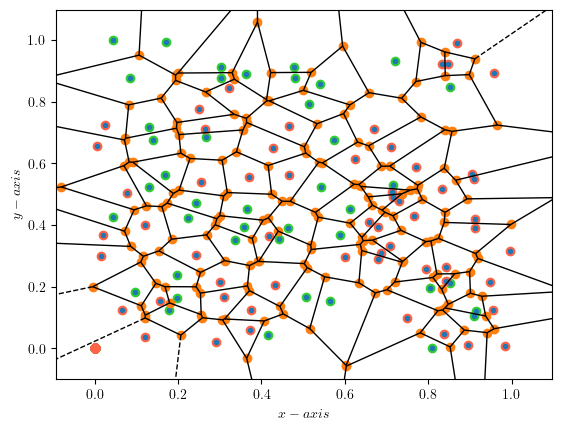

In [6]:
# figure 3 (Voronoi diagram)
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": "Helvetica",
})

points = []
for i in range(N):
    points.append([x[i], y[i]])


fig,ax = plt.subplots(1,1)
vor = Voronoi(points)
voronoi_plot_2d(vor, ax)
ax.scatter(xtg, ytg, c='limegreen')
ax.scatter(xtr, ytr, c='tomato')
ax.set_xlabel("$x-axis$")
ax.set_ylabel("$y-axis$");

Voronoi diagram for 100 randomly generated feature vectors $h_n \in R^2$. Points in green belong to class $+1$ while points in red belong to class $-1$.  